# Provincial Sales Tax Revenue forecasting: 2024–2029

## 1. introduction
This report presents a comprehensive analysis and medium-term forecast (2024-2029) of a province's retail sales tax revenue. It outlines the statistical and econometric techniques used to estimate revenues, drawing on historical data (1987-2023) and forecasted economic indicators. The primary objective is to project tax revenue estimates for inclusion in the Budget and quarterly fiscal updates. The dataset comprises a time series of retail sales tax revenue from 1987 to 2023, along with a forecast database extending to 2029. The goal is to produce accurate and reliable forecasts for the years 2024 to 2029.

## 2. Data
The provided dataset contains a time series of Retail Sales Tax revenue from 1987 to 2023 and a forecast data on economic accounts from 1987 to 2029. The variable names are located in the second row, while the descriptions of each variable are in the first row. First, let's generate a list of variable names along with their corresponding labels.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

np.set_printoptions(precision=3, suppress=True)

In [3]:
# Define the file path:
file_path = r"C:\Users\ams40\Tax\Data 2025-03-05.xls"
# Read the CSV file
df = pd.read_excel(file_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,Year,Retail Sales Tax (Millions $),(Average Aggregation) Gross Domestic Product ...,(Average Aggregation) Gross Domestic Product ...,(Average Aggregation) Real Gross Domestic Pro...,(Average Aggregation) Implicit Price Deflator...,"(Average Aggregation) Consumer Price Index, ...",(Average Aggregation) Wages & Salaries Per Em...,(Average Aggregation) Primary household incom...,(Average Aggregation) Household disposable in...,...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...,(Average Aggregation) Current accounts - Hous...
1,Year,Tax,GDP,RYGDPKM,RQTOM,RPYGDPM,CPI,RWRM,RYHPIM,DI,...,RYHTRGSM,RYHTRGOM,TransfersPaid,RYHTPNM,RYHTPBM,RYHTPRM,RYHTPGM,RYHTPGXM,RYHTPGOM,RYHTPOM
2,1987,610.709358,20815.8959,NaN,NaN,NaN,0.668083,19.171335,14410.9227,12641.898325,...,469.0,1280,4314.02436,181.000995,1144.006165,19.00008,2970.01712,2156.012,814.005121,1344.00724
3,1988,640.11184,22467.927375,NaN,NaN,NaN,0.695833,20.200291,15530.2281,13526.202,...,536.993727,1337.98899,4765.999998,192,1260,22,3292.000002,2381.000003,911.0,1474.000002
4,1989,657.785745,23872.02345,NaN,NaN,NaN,0.728667,20.876299,16436.1016,14475.052,...,593.99375,1384.989452,4951.02352,201.000943,1357.00601,24.000085,3369.016483,2489.012085,880.004401,1582.007038


In [4]:
# Extract variable names from the second row and labels from the first row
variable_names = df.iloc[1].tolist()
labels = df.iloc[0].tolist()

# Create a DataFrame with two columns: Variables and Labels
variables_labels_df = pd.DataFrame({"Variables": variable_names, "Labels": labels})

# Display the resulting table
print(variables_labels_df)

        Variables                                             Labels
0            Year                                               Year
1             Tax                      Retail Sales Tax (Millions $)
2             GDP  (Average Aggregation)  Gross Domestic Product ...
3         RYGDPKM  (Average Aggregation)  Gross Domestic Product ...
4           RQTOM  (Average Aggregation)  Real Gross Domestic Pro...
5         RPYGDPM  (Average Aggregation)  Implicit Price Deflator...
6             CPI  (Average Aggregation)  Consumer Price Index,  ...
7            RWRM  (Average Aggregation)  Wages & Salaries Per Em...
8          RYHPIM  (Average Aggregation)  Primary household incom...
9              DI  (Average Aggregation)  Household disposable in...
10          RH15M  (Average Aggregation)  Population of Labour Fo...
11            RLM  (Average Aggregation)  Labour Force ,   (Thous...
12     Employment  (Average Aggregation)  Employment,   (Thousand...
13          RLURM    (Average Aggr

### 2.1. Data cleaning
Many variables are quite similar to each other and are therefore highly correlated. To address this, we rely on economic theories to identify and select the most important determinants of sales tax revenue. We keep variables below and delete the rest. We also check if there is any missing value in any of the variables.

Tax;	GDP;	CPI;	Disposable Income;	Employment;	Expenditures;	Gross Fixed Capital Formation;	Compensations;	Transfers Received;	Transfers Paid

In [5]:
# Set the second row as column names (variable names)
df.columns = df.iloc[1]

# Drop the first two rows
df2 = df.iloc[2:].reset_index(drop=True)
# Convert data to numeric (handling errors)
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.set_index('Year', inplace=True)
df2.head()

1,Tax,GDP,RYGDPKM,RQTOM,RPYGDPM,CPI,RWRM,RYHPIM,DI,RH15M,...,RYHTRGSM,RYHTRGOM,TransfersPaid,RYHTPNM,RYHTPBM,RYHTPRM,RYHTPGM,RYHTPGXM,RYHTPGOM,RYHTPOM
Year,,,,,,,,,,,,,,,,,,,,,
1987,610.709358,20815.895900,NaN,NaN,NaN,0.668083,19.171335,14410.922700,12641.898325,818.366666,...,469.000000,1280.000000,4314.024360,181.000995,1144.006165,19.000080,2970.017120,2156.012000,814.005121,1344.007240
1988,640.111840,22467.927375,NaN,NaN,NaN,0.695833,20.200291,15530.228100,13526.202000,821.441667,...,536.993727,1337.988990,4765.999998,192.000000,1260.000000,22.000000,3292.000002,2381.000003,911.000000,1474.000002
1989,657.785745,23872.023450,NaN,NaN,NaN,0.728667,20.876299,16436.101600,14475.052000,822.508333,...,593.993750,1384.989452,4951.023520,201.000943,1357.006010,24.000085,3369.016483,2489.012085,880.004401,1582.007038
1990,634.695624,24792.967100,NaN,NaN,NaN,0.762000,21.784017,17711.076425,15177.102875,824.225000,...,659.006351,1512.011127,5729.000000,210.000000,1601.000000,22.000000,3896.000000,2851.000000,1045.000000,1833.000000
1991,605.970391,24640.167375,NaN,NaN,NaN,0.801083,22.200656,17866.904625,15406.906750,827.325000,...,704.005574,1537.010673,5835.022815,216.000839,1629.006405,26.000082,3964.015492,2829.011687,1135.003805,1871.007323


In [6]:
df2 = df2[['Tax', 'GDP', 'CPI', 'DI', 'Employment', 'Expenditure', 'GFCF', 'Compensation', 'TransfersRec', 'TransfersPaid']]
df2

1,Tax,GDP,CPI,DI,Employment,Expenditure,GFCF,Compensation,TransfersRec,TransfersPaid
Year,,,,,,,,,,
1987,610.709358,20815.895900,0.668083,12641.898325,505.275000,12042.000000,4046.032510,10525.026175,2544.999998,4314.024360
1988,640.111840,22467.927375,0.695833,13526.202000,506.233333,12740.948250,4280.961590,11151.025550,2761.973887,4765.999998
1989,657.785745,23872.023450,0.728667,14475.052000,512.875000,13532.076225,4292.016385,11691.000000,2989.973933,4951.023520
1990,634.695624,24792.967100,0.762000,15177.102875,513.875000,14185.897200,4309.017948,12283.000000,3195.026470,5729.000000
1991,605.970391,24640.167375,0.801083,15406.906750,506.750000,14459.143700,3914.006160,12597.000000,3375.024940,5835.022815
1992,620.044242,25128.991300,0.812417,15640.826250,499.916667,14812.070175,3817.950915,12921.976475,3582.000000,6201.000000
1993,651.118232,25174.958450,0.834250,15956.228175,503.758333,15440.812725,4011.013440,13125.000000,3896.975480,6375.999998
1994,702.938271,26675.248100,0.845750,16205.905150,507.675000,16057.975675,4299.009288,13415.000000,3944.000002,6674.000000
1995,740.980047,27694.103900,0.868500,16460.005900,516.333333,16717.000000,4524.000002,13862.977225,4030.000000,7160.000000


In [7]:
# Descriptive Statistics
desc_stats = df2.describe()
desc_stats

1,Tax,GDP,CPI,DI,Employment,Expenditure,GFCF,Compensation,TransfersRec,TransfersPaid
count,37.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1413.459318,55109.724715,1.159891,30962.291041,601.117348,31772.269469,10905.182496,26831.982255,8753.726036,13785.535650
std,684.905295,27113.265160,0.310810,15003.847248,76.328747,15437.109990,5733.155352,12835.174070,5322.996679,7173.278359
min,605.970391,20815.895900,0.668083,12641.898325,499.916667,12042.000000,3817.950915,10525.026175,2544.999998,4314.024360
25%,789.634709,30987.120763,0.912125,17252.992112,529.916667,18392.093575,5711.504283,15132.000000,4319.987872,8193.500001
50%,1229.836275,50853.077000,1.133917,27527.055925,600.341667,29288.021050,10677.000018,25276.000000,7086.976317,12538.021550
75%,2125.000000,73166.614587,1.353083,40503.012075,650.741667,41588.957263,15890.732163,35523.000000,12176.126313,18507.010913
max,2654.000000,112010.513250,1.782163,62238.833400,754.377466,64548.266250,21952.204525,53101.666250,19424.647750,28662.924850


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1987 to 2029
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tax            37 non-null     float64
 1   GDP            43 non-null     float64
 2   CPI            43 non-null     float64
 3   DI             43 non-null     float64
 4   Employment     43 non-null     float64
 5   Expenditure    43 non-null     float64
 6   GFCF           43 non-null     float64
 7   Compensation   43 non-null     float64
 8   TransfersRec   43 non-null     float64
 9   TransfersPaid  43 non-null     float64
dtypes: float64(10)
memory usage: 3.7 KB


# 3. Methodology
To forecast Retail Sales Tax Revenue, we use GDP, Household Disposable Income, Employment, Expenditures, Gross Fixed Capital Formation, Compensations, Transfers Received, and Transfers Paid as independent variables. These variables are well-established economic drivers that directly influence taxable consumption. 

To ensure that the relationships reflect real economic activity rather than inflationary effects, we divide all variables except employment by the Consumer Price Index (CPI) to obtain real values. This approach eliminates distortions caused by price level changes over time, allowing the model to focus on the true relationships between variables. 

Once the regression model is estimated with real data, the resulting forecasts provide real values of Retail Sales Tax revenue for future years. To convert these real forecasts back into nominal terms, we multiply the forecasted real values by the projected CPI for each year in the forecast period. This process ensures that the final nominal forecasts account for expected inflation while maintaining the integrity of the economic relationships modeled in real terms.

In [9]:
# Convert variables to real terms by dividing by CPI
real_columns = ['Tax', 'GDP', 'DI', 'Expenditure', 'GFCF', 'Compensation', 'TransfersRec', 'TransfersPaid']
for col in real_columns:
    df2[f'Real_{col}'] = df2[col] / df2['CPI']
    
df2.head()

1,Tax,GDP,CPI,DI,Employment,Expenditure,GFCF,Compensation,TransfersRec,TransfersPaid,Real_Tax,Real_GDP,Real_DI,Real_Expenditure,Real_GFCF,Real_Compensation,Real_TransfersRec,Real_TransfersPaid
Year,,,,,,,,,,,,,,,,,,
1987,610.709358,20815.895900,0.668083,12641.898325,505.275000,12042.000000,4046.032510,10525.026175,2544.999998,4314.024360,914.121528,31157.633882,18922.636886,18024.697520,6056.179385,15754.061883,3809.405011,6457.314747
1988,640.111840,22467.927375,0.695833,13526.202000,506.233333,12740.948250,4280.961590,11151.025550,2761.973887,4765.999998,919.921207,32289.236938,19438.853169,18310.344786,6152.280128,16025.425936,3969.303789,6849.341312
1989,657.785745,23872.023450,0.728667,14475.052000,512.875000,13532.076225,4292.016385,11691.000000,2989.973933,4951.023520,902.725176,32761.239864,19865.121681,18571.010371,5890.232916,16044.373283,4103.349404,6794.634290
1990,634.695624,24792.967100,0.762000,15177.102875,513.875000,14185.897200,4309.017948,12283.000000,3195.026470,5729.000000,832.933889,32536.702220,19917.457835,18616.662986,5654.879194,16119.422567,4192.948122,7518.372701
1991,605.970391,24640.167375,0.801083,15406.906750,506.750000,14459.143700,3914.006160,12597.000000,3375.024940,5835.022815,756.438645,30758.557000,19232.589302,18049.487607,4885.891388,15724.955786,4213.075967,7283.914882


In [10]:
# Separate data into training (1987-2023) and forecasting (2024-2029) based on index
train_data = df2[df2.index <= 2023]
forecast_data = df2[df2.index > 2023]

In [11]:
# Define independent (X) and dependent (y) variables for training
X_train = train_data[['Real_GDP', 'CPI', 'Employment','Real_DI', 'Real_Expenditure', 'Real_GFCF', 'Real_Compensation', 'Real_TransfersRec', 'Real_TransfersPaid']]
y_train = train_data[['Real_Tax']]
X_forecast = forecast_data[['Real_GDP', 'CPI', 'Employment','Real_DI', 'Real_Expenditure', 'Real_GFCF', 'Real_Compensation', 'Real_TransfersRec', 'Real_TransfersPaid']]


In [12]:
X_train.head()

1,Real_GDP,CPI,Employment,Real_DI,Real_Expenditure,Real_GFCF,Real_Compensation,Real_TransfersRec,Real_TransfersPaid
Year,,,,,,,,,
1987,31157.633882,0.668083,505.275000,18922.636886,18024.697520,6056.179385,15754.061883,3809.405011,6457.314747
1988,32289.236938,0.695833,506.233333,19438.853169,18310.344786,6152.280128,16025.425936,3969.303789,6849.341312
1989,32761.239864,0.728667,512.875000,19865.121681,18571.010371,5890.232916,16044.373283,4103.349404,6794.634290
1990,32536.702220,0.762000,513.875000,19917.457835,18616.662986,5654.879194,16119.422567,4192.948122,7518.372701
1991,30758.557000,0.801083,506.750000,19232.589302,18049.487607,4885.891388,15724.955786,4213.075967,7283.914882


We scale data before regression to standardize feature ranges, improving model performance and preventing bias toward larger values. Splitting data first ensures that scaling parameters (mean, std) are derived only from training data, avoiding information leakage into the test set, thus maintaining model validity and preventing overfitting.

In [13]:
from sklearn.preprocessing import StandardScaler
# Scale the data for Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_forecast_scaled = scaler.transform(X_forecast)

`scaler.fit_transform(X_train)` does two things: it **calculates** the mean and standard deviation from `X_train` (using `.fit`) and then **applies** scaling (using `.transform`). 

`scaler.transform(X_forecast)` only **applies** the previously computed scaling parameters (mean and std from `X_train`) to `X_forecast` without recalculating them. This prevents information leakage.

# 4. Linear Regression Models

Lasso and Ridge Regression moels are chosen as the primary modeling technique due to its robustness against multicollinearity, effectively stabilizing coefficient estimates.

### 4.1. Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

# Train a Lasso Regression model
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(X_train_scaled, y_train)
# Predict Tax in real terms for 2024-2029
real_tax_forecast = Lasso_model.predict(X_forecast_scaled)
# Convert real Tax predictions back to nominal using forecasted CPI
nominal_tax_forecast = real_tax_forecast * X_forecast['CPI'].values

In [15]:
print('number of coefficients not equal to 0:', (Lasso_model.coef_!=0).sum())
print('number of coefficients equal to 0:', (Lasso_model.coef_==0).sum())

number of coefficients not equal to 0: 6
number of coefficients equal to 0: 3


In [16]:
# Create a DataFrame with Year and Nominal Tax Predictions
predictions = pd.DataFrame({"Year": X_forecast.index, "Predicted Nominal Tax": nominal_tax_forecast})
# Display the table
print(predictions)

   Year  Predicted Nominal Tax
0  2024            2798.289643
1  2025            2861.596160
2  2026            2950.781949
3  2027            3051.021554
4  2028            3168.592399
5  2029            3295.671446


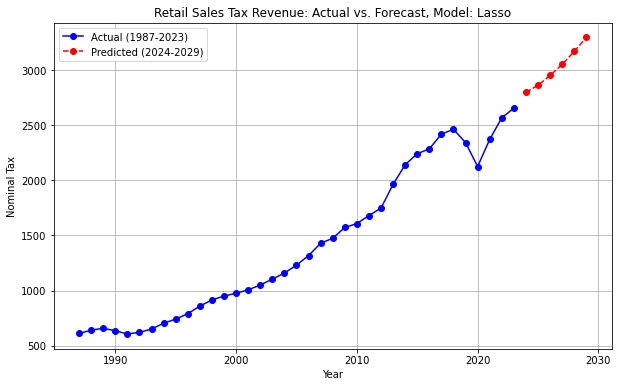

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual nominal tax over time
plt.plot(df2.index, df2['Tax'], label="Actual (1987-2023)", color='blue', marker='o')

# Plot forecasted nominal tax over time (from your model predictions)
plt.plot(X_forecast.index, nominal_tax_forecast, label="Predicted (2024-2029)", color='red', linestyle='dashed', marker='o')

plt.xlabel('Year')
plt.ylabel('Nominal Tax')
plt.title("Retail Sales Tax Revenue: Actual vs. Forecast, Model: Lasso")
plt.legend()
plt.grid(True)
plt.show()

### 4.2. Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
# Predict Tax in real terms for 2024-2029
real_tax_forecast = ridge_model.predict(X_forecast_scaled)
# Convert real Tax predictions back to nominal using forecasted CPI
nominal_tax_forecast = real_tax_forecast * X_forecast['CPI'].values

In [19]:
print('number of coefficients not equal to 0:', (ridge_model.coef_!=0).sum())
print('number of coefficients equal to 0:', (ridge_model.coef_==0).sum())

number of coefficients not equal to 0: 9
number of coefficients equal to 0: 0


In [20]:
# Create a DataFrame with Year and Nominal Tax Predictions
predictions = pd.DataFrame({"Year": X_forecast.index, "Predicted Nominal Tax": nominal_tax_forecast})
# Display the table
print(predictions)

   Year  Predicted Nominal Tax
0  2024            2842.464697
1  2025            2974.498105
2  2026            3084.141894
3  2027            3196.413099
4  2028            3320.984065
5  2029            3456.454253


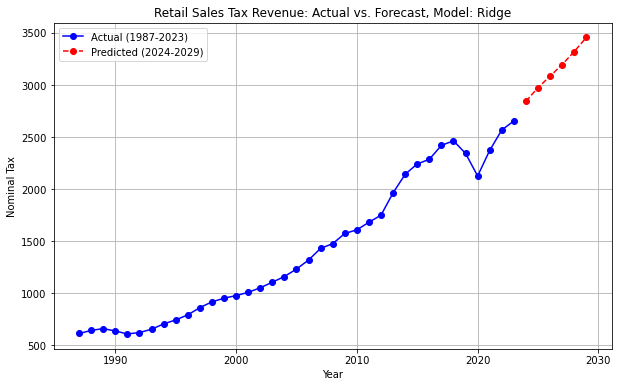

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual nominal tax over time
plt.plot(df2.index, df2['Tax'], label="Actual (1987-2023)", color='blue', marker='o')

# Plot forecasted nominal tax over time (from your model predictions)
plt.plot(X_forecast.index, nominal_tax_forecast, label="Predicted (2024-2029)", color='red', linestyle='dashed', marker='o')

plt.xlabel('Year')
plt.ylabel('Nominal Tax')
plt.title("Retail Sales Tax Revenue: Actual vs. Forecast, Model: Ridge")
plt.legend()
plt.grid(True)
plt.show()

### 4.3. ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
# Predict Tax in real terms for 2024-2029
real_tax_forecast = enet.predict(X_forecast_scaled)
# Convert real Tax predictions back to nominal using forecasted CPI
nominal_tax_forecast = real_tax_forecast * X_forecast['CPI'].values


print('number of coefficients not equal to 0:', (enet.coef_!=0).sum())
print('number of coefficients equal to 0:', (enet.coef_==0).sum())

number of coefficients not equal to 0: 9
number of coefficients equal to 0: 0


In [23]:
# Create a DataFrame with Year and Nominal Tax Predictions
predictions = pd.DataFrame({"Year": X_forecast.index, "Predicted Nominal Tax": nominal_tax_forecast})
# Display the table
print(predictions)

   Year  Predicted Nominal Tax
0  2024            2865.246205
1  2025            3000.931961
2  2026            3112.959080
3  2027            3227.348943
4  2028            3353.541780
5  2029            3490.233830


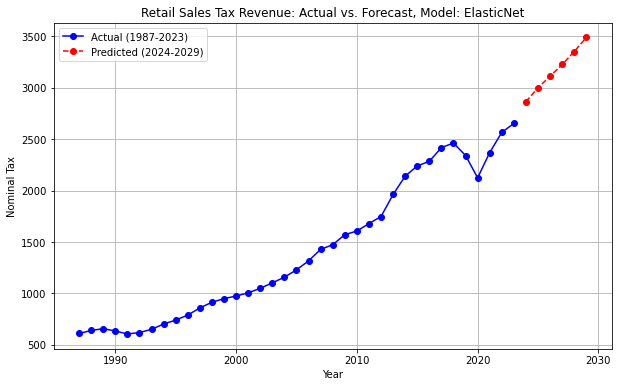

In [24]:
plt.figure(figsize=(10, 6))

# Plot actual nominal tax over time
plt.plot(df2.index, df2['Tax'], label="Actual (1987-2023)", color='blue', marker='o')

# Plot forecasted nominal tax over time (from your model predictions)
plt.plot(X_forecast.index, nominal_tax_forecast, label="Predicted (2024-2029)", color='red', linestyle='dashed', marker='o')

plt.xlabel('Year')
plt.ylabel('Nominal Tax')
plt.title("Retail Sales Tax Revenue: Actual vs. Forecast, Model: ElasticNet")
plt.legend()
plt.grid(True)
plt.show()

### 4.4. ElasticNet with GridSearchCV 
### Adding polynomials to Elastic Net and using GridSearchCV to find the best model
To optimize our model's performance, we employ GridSearchCV to search for the best combination of hyperparameters. Specifically, we explore different polynomial degrees and regularization parameters (alpha and l1_ratio) for Elastic Net regression.
We use Pipelines to streamline the data preprocessing and model training steps. The pipeline consists of:
1-Polynomial Feature Transformation – Expands the feature set by introducing polynomial terms, allowing the model to capture nonlinear relationships.

2-Data Standardization – Standardizes the dataset using StandardScaler(), which is essential for regularized regression models like Ridge and Elastic Net to ensure that all features are on a comparable scale.

3-Elastic Net Regression – A combination of Lasso (L1) and Ridge (L2) regression, which balances feature selection and shrinkage to prevent overfitting.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the pipeline
pipeline_steps = [
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Polynomial feature expansion
    ('scaler', StandardScaler()),  # Standardizing features
    ('model', ElasticNet(tol=0.2))  # Elastic Net Regression
]
pipe = Pipeline(pipeline_steps)

# Define hyperparameter grid for tuning
param_grid = {
    "polynomial__degree": [1, 2, 3],  # Varying polynomial degrees
    "model__alpha": [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    "model__l1_ratio": [0.1, 0.25, 0.5, 0.75, 0.9]  # Balance between L1 (Lasso) and L2 (Ridge)
}

# Perform Grid Search with cross-validation
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

# Retrieve the best model
best_model = search.best_estimator_

# Get the best combination of hyperparameters
best_degree = search.best_params_["polynomial__degree"]
best_alpha = search.best_params_["model__alpha"]
best_l1_ratio = search.best_params_["model__l1_ratio"]

# Print the results
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Alpha: {best_alpha}")
print(f"Best L1 Ratio: {best_l1_ratio}")

Best Polynomial Degree: 1
Best Alpha: 0.001
Best L1 Ratio: 0.9


In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_forecast_poly = poly.transform(X_forecast_scaled)

enet_GS = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
enet_GS.fit(X_train_poly, y_train)
real_tax_forecast = enet_GS.predict(X_forecast_poly)
# Convert real Tax predictions back to nominal using forecasted CPI
nominal_tax_forecast = real_tax_forecast * X_forecast['CPI'].values


print('number of coefficients not equal to 0:', (enet_GS.coef_!=0).sum())
print('number of coefficients equal to 0:', (enet_GS.coef_==0).sum())

number of coefficients not equal to 0: 9
number of coefficients equal to 0: 0


In [27]:
# Create a DataFrame with Year and Nominal Tax Predictions
predictions = pd.DataFrame({"Year": X_forecast.index, "Predicted Nominal Tax": nominal_tax_forecast})
# Display the table
print(predictions)

   Year  Predicted Nominal Tax
0  2024            2811.743050
1  2025            2874.726548
2  2026            2964.416632
3  2027            3065.639791
4  2028            3184.984424
5  2029            3313.841371


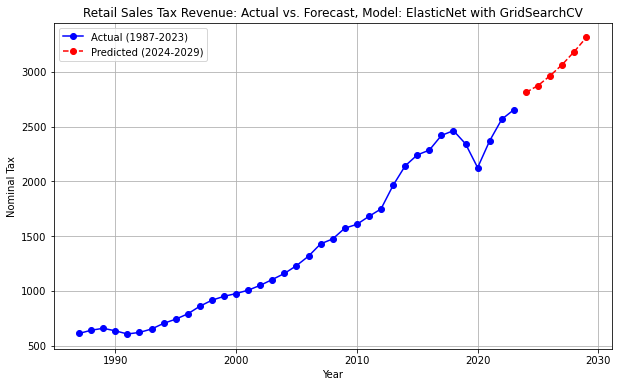

In [29]:
plt.figure(figsize=(10, 6))

# Plot actual nominal tax over time
plt.plot(df2.index, df2['Tax'], label="Actual (1987-2023)", color='blue', marker='o')

# Plot forecasted nominal tax over time (from your model predictions)
plt.plot(X_forecast.index, nominal_tax_forecast, label="Predicted (2024-2029)", color='red', linestyle='dashed', marker='o')

plt.xlabel('Year')
plt.ylabel('Nominal Tax')
plt.title("Retail Sales Tax Revenue: Actual vs. Forecast, Model: ElasticNet with GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import r2_score

# Dictionary to store model names and R² scores
model_results = []

# 1- Lasso model
las = Lasso(alpha=0.1)
las.fit(X_train_scaled, y_train)
y_train_pred_lasso = las.predict(X_train_scaled)
r2_lasso = r2_score(y_train, y_train_pred_lasso)
model_results.append(["Lasso", r2_lasso])

# 2- Ridge model
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge.predict(X_train_scaled)
r2_ridge = r2_score(y_train, y_train_pred_ridge)
model_results.append(["Ridge", r2_ridge])

# 3- ElasticNet model (Using fixed alpha and l1_ratio)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
y_train_pred_enet = enet.predict(X_train_scaled)
r2_enet = r2_score(y_train, y_train_pred_enet)
model_results.append(["ElasticNet", r2_enet])

# 4- ElasticNet model with polynomials and GridSearchCV (Using fixed alpha and l1_ratio)
enet_GS = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
enet_GS.fit(X_train_scaled, y_train)
y_train_pred_enet_GS = enet_GS.predict(X_train_scaled)
r2_enet_GS = r2_score(y_train, y_train_pred_enet_GS)
model_results.append(["ElasticNet_GS", r2_enet_GS])

# Create DataFrame to display results
r2_results_df = pd.DataFrame(model_results, columns=["Model Name", "R-Square (Training Set)"])
r2_results_df

,Model Name,R-Square (Training Set)
0,Lasso,0.986469
1,Ridge,0.977348
2,ElasticNet,0.975299
3,ElasticNet_GS,0.986453


the Lasso model shows the highest R-Square and is probably the best model.

# 5. Insights and key findings

in this study we used 4 differnt models to predict the sales tax revenue. all models predict an increase in the tax revvenue in the comming years. the Lasso model produced the best balance of accuracy and interpretability. It outperformed other models based on the R² computation.

Polynomial feature expansion did not significantly enhance predictive power, suggesting that the relationship between independent variables and tax revenue remains relatively linear.